In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats
import seaborn as sns; sns.set_theme(color_codes=True)
import os
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.metrics
import sklearn.datasets
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
sns.set_style(style='white')

In [3]:
common_TADs = pd.read_csv("Carter Lab Datasets\common_TADs_meQTLs.csv")
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K27me3,H4K20me1,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
0,0,1,36960000,37910000,1,36960000,37910000,"255,255,0",1.8249,0.079690,...,0.167622,0.705304,206,4,71,141,950000,0.062006,0.021654,0.047834
1,1,1,38485000,39310000,1,38485000,39310000,"255,255,0",1.7513,0.051417,...,0.226065,0.369001,219,4,122,97,825000,0.075906,0.042846,0.037893
2,2,1,157140000,157480000,1,157140000,157480000,"255,255,0",1.3679,0.065425,...,0.275085,0.000000,283,4,90,194,340000,0.238009,0.076695,0.183891
3,3,1,64075000,64730000,1,64075000,64730000,"255,255,0",1.3300,0.074093,...,0.244738,0.000000,301,4,201,189,655000,0.131405,0.088911,0.092995
4,4,1,110325000,110530000,1,110325000,110530000,"255,255,0",1.5128,0.032783,...,0.499037,0.704529,38,0,26,22,205000,0.053005,0.036747,0.034587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.2678,0.032125,...,0.000000,0.000000,0,0,0,0,205000,0.000000,0.000000,0.000000
1096,1096,X,37785000,38035000,X,37785000,38035000,"255,255,0",1.5301,0.051187,...,1.000000,0.000000,0,1,0,0,250000,0.000000,0.000000,0.000000
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.0945,0.040047,...,0.000000,1.000000,0,1,0,0,235000,0.000000,0.000000,0.000000
1098,1098,X,102790000,102945000,X,102790000,102945000,"255,255,0",1.2129,0.041055,...,0.000000,0.000000,0,1,0,0,155000,0.000000,0.000000,0.000000


In [7]:
common_TADs = common_TADs.sort_values(["chr1", "x1"])
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K27me3,H4K20me1,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
26,26,1,7295000,7710000,1,7295000,7710000,"255,255,0",0.81273,0.053374,...,0.274394,0.000000,239,4,102,197,415000,0.164678,0.071212,0.152988
10,10,1,7715000,8010000,1,7715000,8010000,"255,255,0",1.23070,0.045249,...,0.460006,0.000000,528,4,409,335,295000,0.511798,0.401701,0.365983
91,91,1,8030000,8410000,1,8030000,8410000,"255,255,0",1.76650,0.056312,...,1.000000,0.707106,245,1,180,99,380000,0.184361,0.137243,0.083963
131,131,1,9170000,9295000,1,9170000,9295000,"255,255,0",1.21450,0.022215,...,0.356945,1.000000,51,0,49,41,125000,0.116667,0.113576,0.105709
68,68,1,9330000,9550000,1,9330000,9550000,"255,255,0",1.51850,0.048085,...,1.000000,0.000000,74,4,43,42,220000,0.096182,0.056630,0.061527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1088,X,108950000,109125000,X,108950000,109125000,"255,255,0",1.64140,0.051367,...,0.000000,0.000000,0,1,0,0,175000,0.000000,0.000000,0.000000
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.09450,0.040047,...,0.000000,1.000000,0,1,0,0,235000,0.000000,0.000000,0.000000
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.26780,0.032125,...,0.000000,0.000000,0,0,0,0,205000,0.000000,0.000000,0.000000
1091,1091,X,133635000,133905000,X,133635000,133905000,"255,255,0",1.55090,0.059014,...,0.707107,0.000000,0,1,0,0,270000,0.000000,0.000000,0.000000


In [4]:
boundary_regions = pd.read_csv("Carter Lab Datasets/boundary_regions.csv")
del boundary_regions["Unnamed: 0"]
boundary_regions

,chr1,x1,x2
0,1,7710000,7715000
1,1,8010000,8030000
2,1,8410000,9170000
3,1,9295000,9330000
4,1,9550000,11075000
...,...,...,...
1072,X,108880000,108950000
1073,X,109125000,109150000
1074,X,109385000,117750000
1075,X,117955000,133635000


In [5]:
meqtls = pd.read_csv("Carter Lab Datasets/meQTL Data/unique_meqtls.csv")
meqtls

,Unnamed: 0,Unnamed: 0.1,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp
0,0,0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33952621
1,1,1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33954560
2,2,2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33953186
3,3,3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91676709
4,4,4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91677926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236137,1236137,293433,UCEC,rs60260871,chr3:124711371,C/T,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711371
1236138,1236138,293434,UCEC,rs57574713,chr3:124711386,G/A,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711386
1236139,1236139,293449,UCEC,rs10903612,chr10:2018353,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2018353
1236140,1236140,293450,UCEC,rs4880953,chr10:2019373,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2019373


In [6]:
meqtls["probe_chr"]=meqtls["probe_position"].str.split(":").str[0]
meqtls["probe_bp"]=meqtls["probe_position"].str.split(":").str[1]
meqtls["probe_bp"]=pd.to_numeric(meqtls["probe_bp"])
meqtls

,Unnamed: 0,Unnamed: 0.1,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp,probe_chr,probe_bp
0,0,0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33952621,chr2,33951647
1,1,1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33954560,chr2,33951647
2,2,2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33953186,chr2,33951647
3,3,3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91676709,chr8,91681699
4,4,4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91677926,chr8,91681699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236137,1236137,293433,UCEC,rs60260871,chr3:124711371,C/T,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711371,chr3,124705145
1236138,1236138,293434,UCEC,rs57574713,chr3:124711386,G/A,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711386,chr3,124705145
1236139,1236139,293449,UCEC,rs10903612,chr10:2018353,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2018353,chr10,1416569
1236140,1236140,293450,UCEC,rs4880953,chr10:2019373,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2019373,chr10,1416569


In [7]:
meqtls["bp"]=pd.to_numeric(meqtls["bp"])
meqtls["p-value"]=pd.to_numeric(meqtls["p-value"],errors="coerce")
compiled_meqtl_sig=meqtls[meqtls["p-value"]<.00001]
compiled_meqtl_sig=compiled_meqtl_sig[compiled_meqtl_sig["p-value"]>0]

In [6]:
compiled_meqtl_sig

,Unnamed: 0,Unnamed: 0.1,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp
0,0,0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33952621
1,1,1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33954560
2,2,2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33953186
3,3,3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91676709
4,4,4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91677926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236137,1236137,293433,UCEC,rs60260871,chr3:124711371,C/T,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711371
1236138,1236138,293434,UCEC,rs57574713,chr3:124711386,G/A,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711386
1236139,1236139,293449,UCEC,rs10903612,chr10:2018353,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2018353
1236140,1236140,293450,UCEC,rs4880953,chr10:2019373,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2019373


In [7]:
chr1_old = common_TADs[common_TADs["chr1"] == "1"]
chr1_short = pd.DataFrame()
chr1_short["chr"] = chr1_old["chr1"]
chr1_short["x1"] = chr1_old["x1"]
chr1_short["x2"] = chr1_old["x2"]
chr1_short["labels"] = chr1_old["KMeans_State_Labels"]
chr1_short


,chr,x1,x2,labels
26,1,7295000,7710000,4
10,1,7715000,8010000,4
91,1,8030000,8410000,1
131,1,9170000,9295000,0
68,1,9330000,9550000,4
...,...,...,...,...
19,1,229385000,229630000,4
112,1,244465000,244620000,0
116,1,244765000,244960000,4
60,1,244980000,245215000,1


In [8]:
names = []
for i, row in chr1_short.iterrows():
    if row["labels"] == 0:
        names.append("Mixed")
    elif row["labels"] == 1 or row["labels"] == 4:
        names.append("Inactive")
    else:
        names.append("Active")
chr1_short["label_name"] = names
chr1_short

,chr,x1,x2,labels,label_name
26,1,7295000,7710000,4,Inactive
10,1,7715000,8010000,4,Inactive
91,1,8030000,8410000,1,Inactive
131,1,9170000,9295000,0,Mixed
68,1,9330000,9550000,4,Inactive
...,...,...,...,...,...
19,1,229385000,229630000,4,Inactive
112,1,244465000,244620000,0,Mixed
116,1,244765000,244960000,4,Inactive
60,1,244980000,245215000,1,Inactive


In [12]:
commonTADs_short = pd.DataFrame()
commonTADs_short["chr"] = common_TADs["chr1"]
commonTADs_short["x1"] = common_TADs["x1"]
commonTADs_short["x2"] = common_TADs["x2"]
commonTADs_short["labels"] = common_TADs["KMeans_State_Labels"]
commonTADs_short


,chr,x1,x2,labels
26,1,7295000,7710000,4
10,1,7715000,8010000,4
91,1,8030000,8410000,1
131,1,9170000,9295000,0
68,1,9330000,9550000,4
...,...,...,...,...
1088,X,108950000,109125000,1
1097,X,109150000,109385000,1
1095,X,117750000,117955000,0
1091,X,133635000,133905000,1


In [13]:
names2 = []
for i, row in commonTADs_short.iterrows():
    if row["labels"] == 0:
        names2.append("Mixed")
    elif row["labels"] == 1 or row["labels"] == 4:
        names2.append("Inactive")
    else:
        names2.append("Active")
commonTADs_short["label_name"] = names2
commonTADs_short

,chr,x1,x2,labels,label_name
26,1,7295000,7710000,4,Inactive
10,1,7715000,8010000,4,Inactive
91,1,8030000,8410000,1,Inactive
131,1,9170000,9295000,0,Mixed
68,1,9330000,9550000,4,Inactive
...,...,...,...,...,...
1088,X,108950000,109125000,1,Inactive
1097,X,109150000,109385000,1,Inactive
1095,X,117750000,117955000,0,Mixed
1091,X,133635000,133905000,1,Inactive


In [16]:
def count_meqtls(chrom, x1, x2):
    common_chr = meqtls[meqtls["chr"] == "chr"+chrom]
    snps = common_chr[(common_chr["bp"] >= x1) & (common_chr["bp"] <= x2)]
    return len(snps)

In [12]:
chr1_short.iloc[1]["label_name"]

'Inactive'

In [49]:
inactive_active = [[], []]
inactive_active_boundary = []
active_inactive = [[], []]
active_inactive_boundary = []
inactive_inactive = [[], []]
inactive_inactive_boundary = []
active_active = [[], []]
active_active_boundary = []
mixed_active = [[], []]
mixed_active_boundary = []
active_mixed = [[], []]
active_mixed_boundary = []
mixed_inactive = [[], []]
mixed_inactive_boundary = []
inactive_mixed = [[], []]
inactive_mixed_boundary = []
mixed_mixed = [[], []]
mixed_mixed_boundary = []

ind = 0
for i, row in commonTADs_short.iterrows():
    if ind % 10 == 0:
        print(ind)
    if ind+1 < len(commonTADs_short):
        chr1 = row["chr"]
        start1 = row["x1"]
        end1 = row["x2"]
        chr2 = commonTADs_short.iloc[ind+1]["chr"]
        start2 = commonTADs_short.iloc[ind+1]["x1"]
        end2 = commonTADs_short.iloc[ind+1]["x2"]
        label1 = row["label_name"]
        label2 = commonTADs_short.iloc[ind+1]["label_name"]
        if chr1 != chr2:
            continue
        if label1 == "Inactive" and label2 == "Active":
            inactive_active[0].append(count_meqtls(chr1, start1, end1))
            inactive_active[1].append(count_meqtls(chr1, start2, end2))
            if start2 > end1:
                inactive_active_boundary.append(count_meqtls(chr1, end1, start2))
        if label1 == "Active" and label2 == "Inactive":
            active_inactive[0].append(count_meqtls(chr1, start1, end1))
            active_inactive[1].append(count_meqtls(chr1, start2, end2))
            if start2 > end1:
                active_inactive_boundary.append(count_meqtls(chr1, end1, start2))
        if label1 == "Inactive" and label2 == "Inactive":
            inactive_inactive[0].append(count_meqtls(chr1, start1, end1))
            inactive_inactive[1].append(count_meqtls(chr1, start2, end2))
            if start2 > end1:
                inactive_active_boundary.append(count_meqtls(chr1, end1, start2))
        if label1 == "Active" and label2 == "Active":
            active_active[0].append(count_meqtls(chr1, start1, end1))
            active_active[1].append(count_meqtls(chr1, start2, end2))
            if start2 > end1:
                inactive_inactive_boundary.append(count_meqtls(chr1, end1, start2))
        if label1 == "Mixed" and label2 == "Active":
            mixed_active[0].append(count_meqtls(chr1, start1, end1))
            mixed_active[1].append(count_meqtls(chr1, start2, end2))
            if start2 > end1:
                mixed_active_boundary.append(count_meqtls(chr1, end1, start2))
        if label1 == "Active" and label2 == "Mixed":
            active_mixed[0].append(count_meqtls(chr1, start1, end1))
            active_mixed[1].append(count_meqtls(chr1, start2, end2))
            if start2 > end1:
                active_mixed_boundary.append(count_meqtls(chr1, end1, start2))
        if label1 == "Mixed" and label2 == "Inactive":
            mixed_inactive[0].append(count_meqtls(chr1, start1, end1))
            mixed_inactive[1].append(count_meqtls(chr1, start2, end2))
            if start2 > end1:
                mixed_inactive_boundary.append(count_meqtls(chr1, end1, start2))
        if label1 == "Inactive" and label2 == "Mixed":
            inactive_mixed[0].append(count_meqtls(chr1, start1, end1))
            inactive_mixed[1].append(count_meqtls(chr1, start2, end2))
            if start2 > end1:
                inactive_mixed_boundary.append(count_meqtls(chr1, end1, start2))
        if label1 == "Mixed" and label2 == "Mixed":
            mixed_mixed[0].append(count_meqtls(chr1, start1, end1))
            mixed_mixed[1].append(count_meqtls(chr1, start2, end2))
            if start2 > end1:
                mixed_mixed_boundary.append(count_meqtls(chr1, end1, start2))
    ind += 1

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090


In [52]:
inactive_active = np.array(inactive_active)
inactive_active_boundary = np.array(inactive_active_boundary)
active_inactive = np.array(active_inactive)
active_inactive_boundary = np.array(active_inactive_boundary)
inactive_inactive = np.array(inactive_inactive)
inactive_inactive_boundary = np.array(inactive_inactive_boundary)
active_active = np.array(active_active)
active_active_boundary = np.array(active_active_boundary)
mixed_active = np.array(mixed_active)
mixed_active_boundary = np.array(mixed_active_boundary)
active_mixed = np.array(active_mixed)
active_mixed_boundary = np.array(active_mixed_boundary)
mixed_inactive = np.array(mixed_inactive)
mixed_inactive_boundary = np.array(mixed_inactive_boundary)
inactive_mixed = np.array(inactive_mixed)
inactive_mixed_boundary = np.array(inactive_mixed_boundary)
mixed_mixed = np.array(mixed_mixed)
mixed_mixed_boundary = np.array(mixed_mixed_boundary)

In [50]:
num_active = len(common_TADs[(common_TADs["KMeans_State_Labels"] == 2) | (common_TADs["KMeans_State_Labels"] == 3)])
num_inactive = len(common_TADs[(common_TADs["KMeans_State_Labels"] == 1) | (common_TADs["KMeans_State_Labels"] == 4)])
num_mixed = len(common_TADs[(common_TADs["KMeans_State_Labels"] == 0)])
num_boundary = 1077

In [55]:
print(stats.kruskal(inactive_active[0]/num_inactive, inactive_active_boundary/num_boundary, inactive_active[1]/num_active))
print(stats.kruskal(active_inactive[0]/num_active, active_inactive_boundary/num_boundary, active_inactive[1]/num_inactive))
print(stats.kruskal(active_active[0]/num_active, active_active[1]/num_active))
print(stats.kruskal(inactive_inactive[0]/num_inactive, inactive_inactive_boundary/num_boundary, inactive_inactive[1]/num_inactive))

KruskalResult(statistic=12.412529264205055, pvalue=0.0020167567400798353)
KruskalResult(statistic=9.99607827172554, pvalue=0.006751172159848707)
KruskalResult(statistic=0.002588324122748663, pvalue=0.9594246686941641)
KruskalResult(statistic=0.9633985128104149, pvalue=0.6177328130183386)


In [57]:
print(stats.ttest_ind(inactive_inactive[0]/num_inactive, inactive_inactive_boundary/num_boundary, equal_var=False))

Ttest_indResult(statistic=-0.8740239206217407, pvalue=0.44630258858448113)


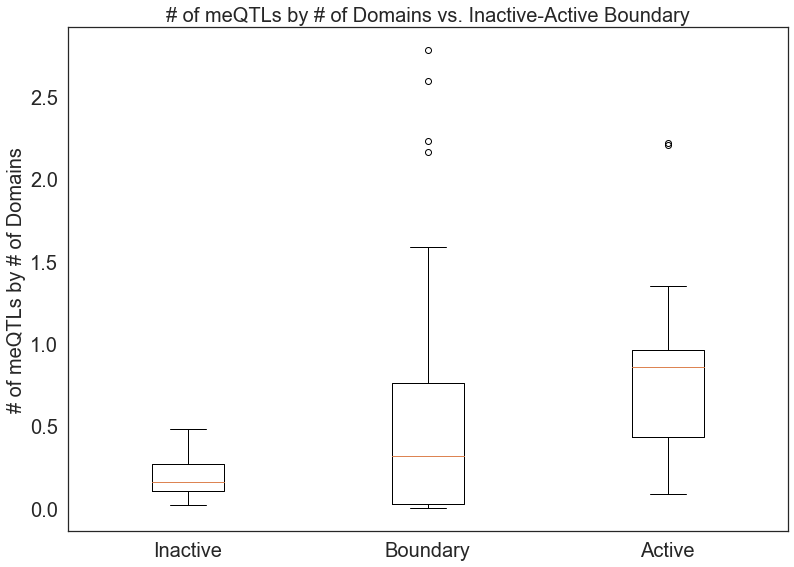

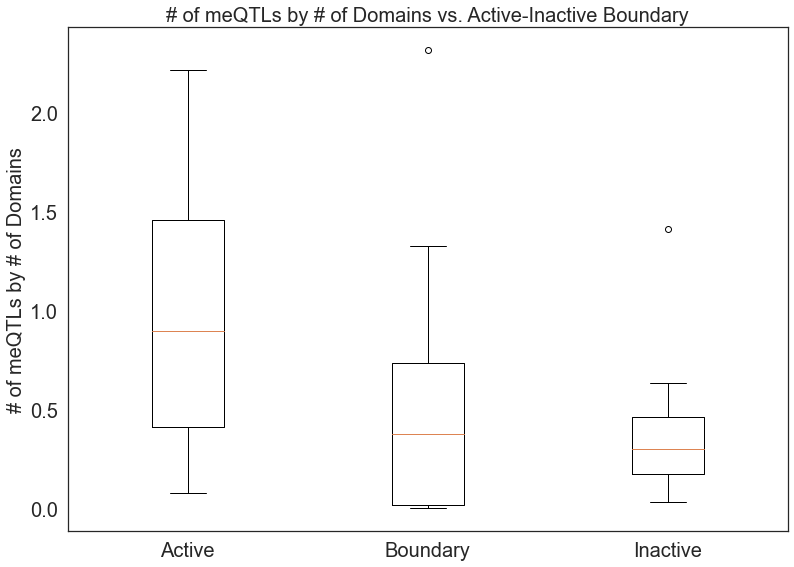

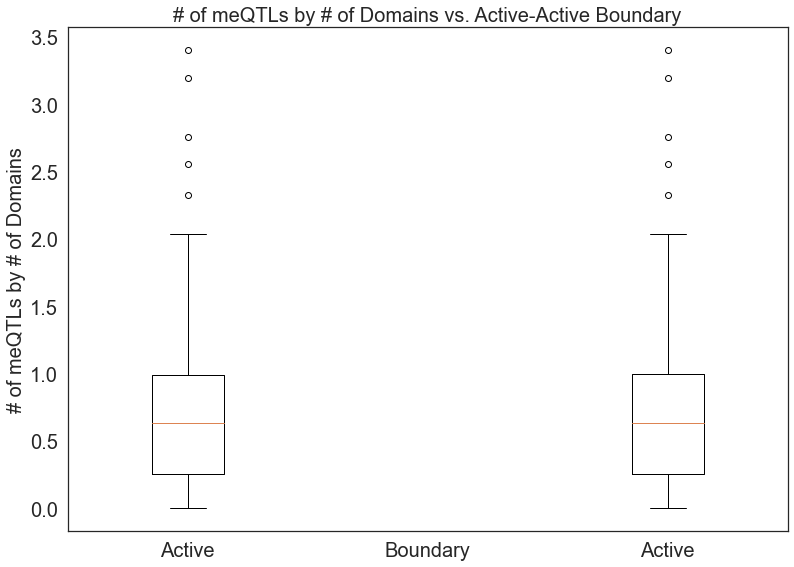

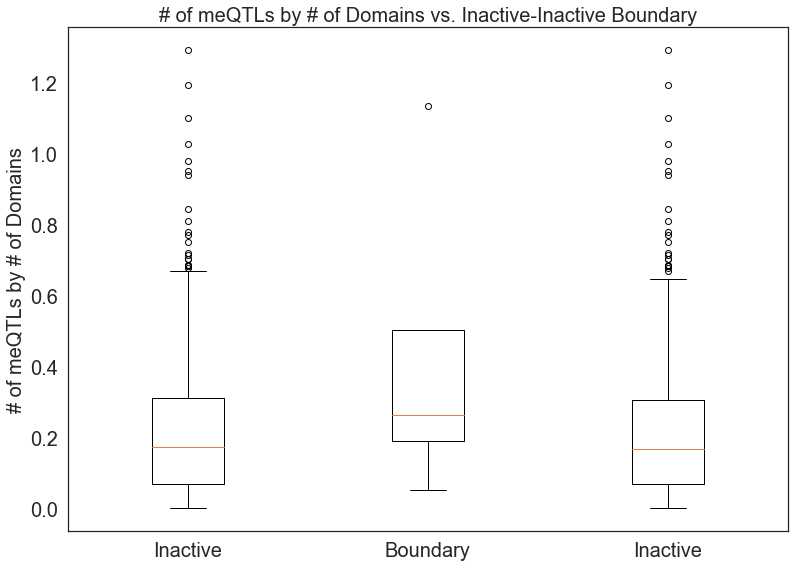

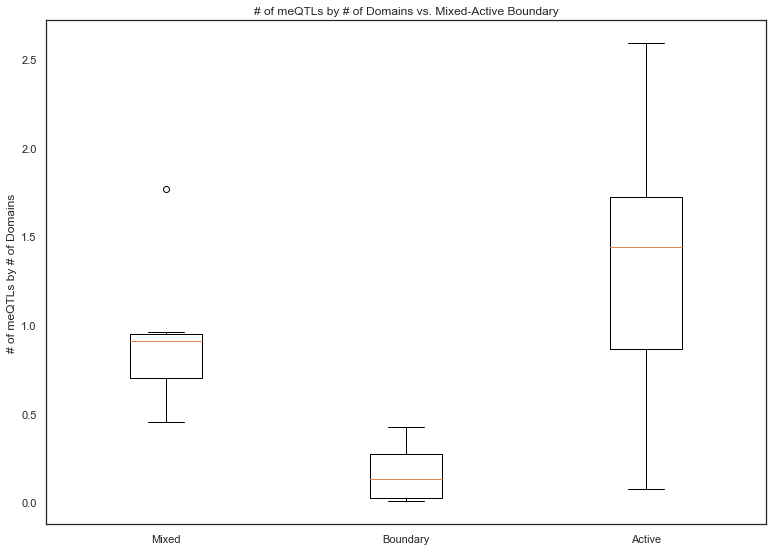

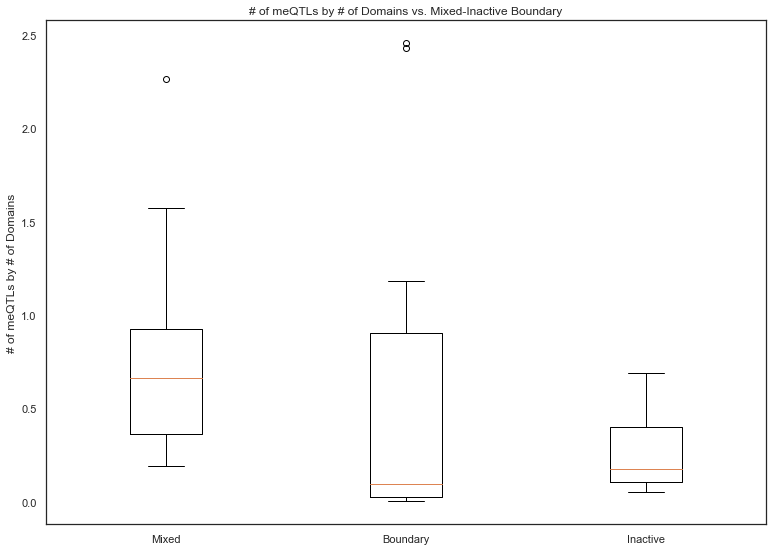

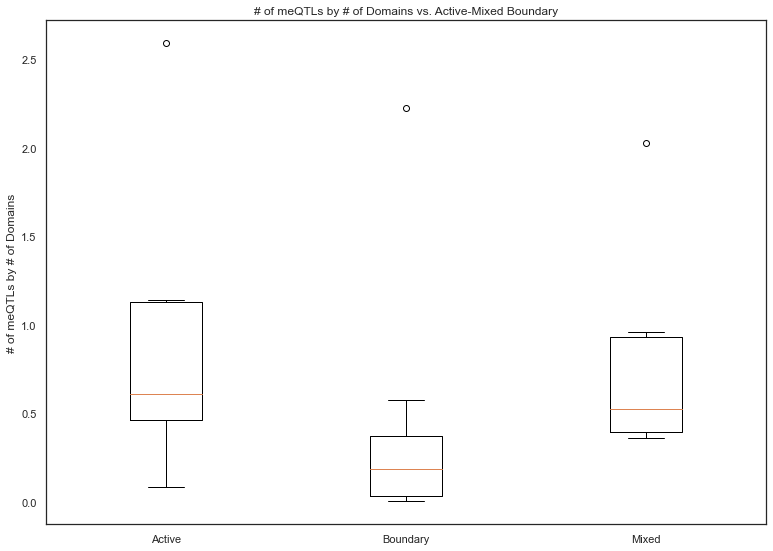

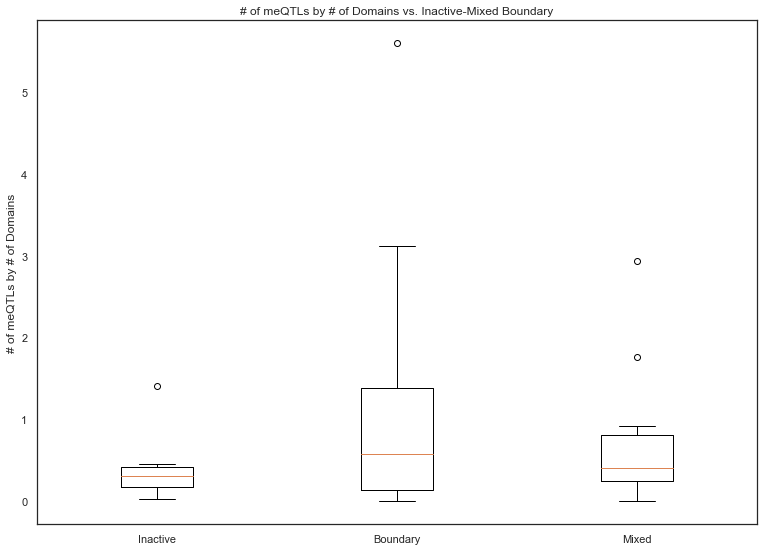

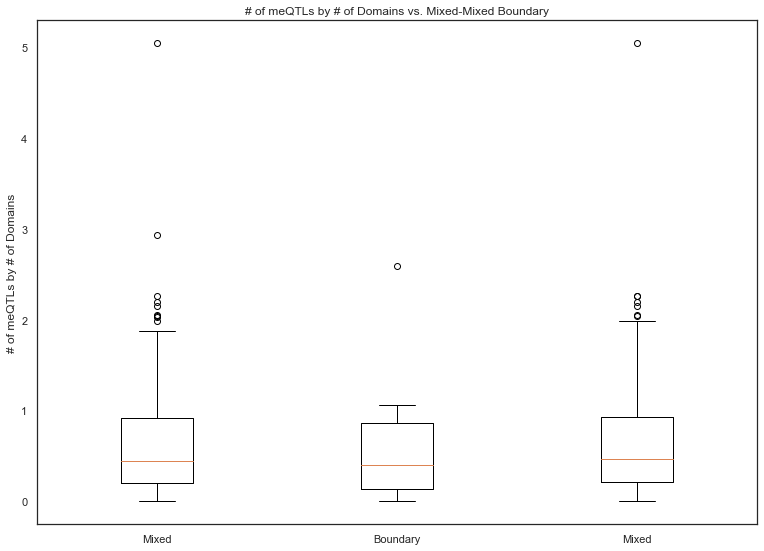

In [53]:
data = [inactive_active[0]/num_inactive, inactive_active_boundary/num_boundary, inactive_active[1]/num_active]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
boxplt = ax.boxplot(data)
plt.ylabel("# of meQTLs by # of Domains", fontsize=20)
plt.title("# of meQTLs by # of Domains vs. Inactive-Active Boundary", fontsize=20)
ax.set_xticklabels(["Inactive", "Boundary", "Active"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

data2 = [active_inactive[0]/num_active, active_inactive_boundary/num_boundary, active_inactive[1]/num_inactive]
fig2 = plt.figure(figsize =(10, 7))
ax2 = fig2.add_axes([0, 0, 1, 1])
boxplt2 = ax2.boxplot(data2)
plt.ylabel("# of meQTLs by # of Domains", fontsize=20)
plt.title("# of meQTLs by # of Domains vs. Active-Inactive Boundary", fontsize=20)
ax2.set_xticklabels(["Active", "Boundary", "Inactive"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

data3 = [active_active[0]/num_active, active_active_boundary/num_boundary, active_active[1]/num_active]
fig3 = plt.figure(figsize =(10, 7))
ax3 = fig3.add_axes([0, 0, 1, 1])
boxplt3 = ax3.boxplot(data3)
plt.ylabel("# of meQTLs by # of Domains", fontsize=20)
plt.title("# of meQTLs by # of Domains vs. Active-Active Boundary", fontsize=20)
ax3.set_xticklabels(["Active", "Boundary", "Active"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

data4 = [inactive_inactive[0]/num_inactive, inactive_inactive_boundary/num_boundary, inactive_inactive[1]/num_inactive]
fig4 = plt.figure(figsize =(10, 7))
ax4 = fig4.add_axes([0, 0, 1, 1])
boxplt4 = ax4.boxplot(data4)
plt.ylabel("# of meQTLs by # of Domains", fontsize=20)
plt.title("# of meQTLs by # of Domains vs. Inactive-Inactive Boundary", fontsize=20)
ax4.set_xticklabels(["Inactive", "Boundary", "Inactive"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

data5 = [mixed_active[0]/num_mixed, mixed_active_boundary/num_boundary, mixed_active[1]/num_active]
fig5 = plt.figure(figsize =(10, 7))
ax5 = fig5.add_axes([0, 0, 1, 1])
boxplt5 = ax5.boxplot(data5)
plt.ylabel("# of meQTLs by # of Domains")
plt.title("# of meQTLs by # of Domains vs. Mixed-Active Boundary")
ax5.set_xticklabels(["Mixed", "Boundary", "Active"])
plt.show()

data6 = [mixed_inactive[0]/num_mixed, mixed_inactive_boundary/num_boundary, mixed_inactive[1]/num_inactive]
fig6 = plt.figure(figsize =(10, 7))
ax6 = fig6.add_axes([0, 0, 1, 1])
boxplt6 = ax6.boxplot(data6)
plt.ylabel("# of meQTLs by # of Domains")
plt.title("# of meQTLs by # of Domains vs. Mixed-Inactive Boundary")
ax6.set_xticklabels(["Mixed", "Boundary", "Inactive"])
plt.show()

data7 = [active_mixed[0]/num_active, active_mixed_boundary/num_boundary, active_mixed[1]/num_mixed]
fig7 = plt.figure(figsize =(10, 7))
ax7 = fig7.add_axes([0, 0, 1, 1])
boxplt7 = ax7.boxplot(data7)
plt.ylabel("# of meQTLs by # of Domains")
plt.title("# of meQTLs by # of Domains vs. Active-Mixed Boundary")
ax7.set_xticklabels(["Active", "Boundary", "Mixed"])
plt.show()

data8 = [inactive_mixed[0]/num_inactive, inactive_mixed_boundary/num_boundary, inactive_mixed[1]/num_mixed]
fig8 = plt.figure(figsize =(10, 7))
ax8 = fig8.add_axes([0, 0, 1, 1])
boxplt8 = ax8.boxplot(data8)
plt.ylabel("# of meQTLs by # of Domains")
plt.title("# of meQTLs by # of Domains vs. Inactive-Mixed Boundary")
ax8.set_xticklabels(["Inactive", "Boundary", "Mixed"])
plt.show()

data9 = [mixed_mixed[0]/num_mixed, mixed_mixed_boundary/num_boundary, mixed_mixed[1]/num_mixed]
fig9 = plt.figure(figsize =(10, 7))
ax9 = fig9.add_axes([0, 0, 1, 1])
boxplt9 = ax9.boxplot(data9)
plt.ylabel("# of meQTLs by # of Domains")
plt.title("# of meQTLs by # of Domains vs. Mixed-Mixed Boundary")
ax9.set_xticklabels(["Mixed", "Boundary", "Mixed"])
plt.show()


In [8]:
oncogenes_promoters = pd.read_csv("Carter Lab Datasets/oncogenes_promoters.txt")
oncogenes_promoters

,Unnamed: 0,chr,start,end,id,4,strand
0,0,chr1,244006886,244007886,NM_001206729.2_up_1000_chr1_244006887_r,0,-
1,1,chr1,162600764,162601764,NM_001354982.2_up_1000_chr1_162600765_f,0,+
2,2,chr1,162599652,162600652,NM_001354983.2_up_1000_chr1_162599653_f,0,+
3,3,chr1,150897738,150898738,NM_001366417.1_up_1000_chr1_150897739_f,0,+
4,4,chr1,244014381,244015381,NM_001370074.1_up_1000_chr1_244014382_r,0,-
...,...,...,...,...,...,...,...
167,167,chr21,44527680,44528680,NM_006758.3_up_1000_chr21_44527681_r,0,-
168,168,chr21,44527688,44528688,NM_001025203.1_up_1000_chr21_44527689_r,0,-
169,169,chr22,22221935,22222935,NM_002745.5_up_1000_chr22_22221936_r,0,-
170,170,chr22,20066763,20067763,NM_022720.7_up_1000_chr22_20066764_f,0,+


In [9]:
tsg_promoters = pd.read_csv("Carter Lab Datasets/tsg_promoters.txt")
tsg_promoters

,Unnamed: 0,chr,start,end,id,4,strand
0,0,chr1,241683055,241684055,NM_000143.4_up_1000_chr1_241683056_r,0,-
1,1,chr1,116914865,116915865,NM_000701.8_up_1000_chr1_116914866_f,0,+
2,2,chr1,93296596,93297596,NM_000969.5_up_1000_chr1_93296597_f,0,+
3,3,chr1,14074909,14075909,NM_001007257.3_up_1000_chr1_14074910_f,0,+
4,4,chr1,14025682,14026682,NM_001135610.2_up_1000_chr1_14025683_f,0,+
...,...,...,...,...,...,...,...
364,364,chr22,29998544,29999544,NM_016418.5_up_1000_chr22_29998545_f,0,+
365,365,chr22,29998621,29999621,NR_156186.2_up_1000_chr22_29998622_f,0,+
366,366,chr22,21335585,21336585,NM_006767.4_up_1000_chr22_21335586_f,0,+
367,367,chr22,24128152,24129152,NM_001362877.2_up_1000_chr22_24128153_f,0,+


In [32]:
all_promoters = pd.concat([oncogenes_promoters, tsg_promoters])
all_promoters.reset_index(drop=True, inplace=True)
all_promoters

,Unnamed: 0,chr,start,end,id,4,strand
0,0,chr1,244006886,244007886,NM_001206729.2_up_1000_chr1_244006887_r,0,-
1,1,chr1,162600764,162601764,NM_001354982.2_up_1000_chr1_162600765_f,0,+
2,2,chr1,162599652,162600652,NM_001354983.2_up_1000_chr1_162599653_f,0,+
3,3,chr1,150897738,150898738,NM_001366417.1_up_1000_chr1_150897739_f,0,+
4,4,chr1,244014381,244015381,NM_001370074.1_up_1000_chr1_244014382_r,0,-
...,...,...,...,...,...,...,...
536,364,chr22,29998544,29999544,NM_016418.5_up_1000_chr22_29998545_f,0,+
537,365,chr22,29998621,29999621,NR_156186.2_up_1000_chr22_29998622_f,0,+
538,366,chr22,21335585,21336585,NM_006767.4_up_1000_chr22_21335586_f,0,+
539,367,chr22,24128152,24129152,NM_001362877.2_up_1000_chr22_24128153_f,0,+


In [34]:
meqtls

,Unnamed: 0,Unnamed: 0.1,cancer_type,snp,snp_position,alleles,probes,probe_position,probe_gene,beta,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,chr,bp,probe_chr,probe_bp
0,0,0,BLCA,rs11684598,chr2:33952621,G/A,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33952621,chr2,33951647
1,1,1,BLCA,rs12232965,chr2:33954560,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33954560,chr2,33951647
2,2,2,BLCA,rs7574695,chr2:33953186,C/T,cg04131969,chr2:33951647,MYADML,-1.24,...,NaN,NaN,NaN,NaN,NaN,NaN,chr2,33953186,chr2,33951647
3,3,3,BLCA,rs11777332,chr8:91676709,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91676709,chr8,91681699
4,4,4,BLCA,rs4332092,chr8:91677926,G/A,cg16814680,chr8:91681699,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,chr8,91677926,chr8,91681699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236137,1236137,293433,UCEC,rs60260871,chr3:124711371,C/T,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711371,chr3,124705145
1236138,1236138,293434,UCEC,rs57574713,chr3:124711386,G/A,cg11029367,chr3:124705145,HEG1,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,chr3,124711386,chr3,124705145
1236139,1236139,293449,UCEC,rs10903612,chr10:2018353,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2018353,chr10,1416569
1236140,1236140,293450,UCEC,rs4880953,chr10:2019373,C/T,cg16296438,chr10:1416569,ADARB2,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,chr10,2019373,chr10,1416569


In [45]:
common_TADs

,Unnamed: 0,chr1,x1,x2,chr2,y1,y2,color,f1,f2,...,H3K27me3,H4K20me1,#meqtl,KMeans_State_Labels,#meqtl_pos,#meqtl_neg,domain_size,norm_meqtl_by_size,norm_pos_meqtl_by_size,norm_neg_meqtl_by_size
26,26,1,7295000,7710000,1,7295000,7710000,"255,255,0",0.81273,0.053374,...,0.274394,0.000000,239,4,102,197,415000,0.164678,0.071212,0.152988
10,10,1,7715000,8010000,1,7715000,8010000,"255,255,0",1.23070,0.045249,...,0.460006,0.000000,528,4,409,335,295000,0.511798,0.401701,0.365983
91,91,1,8030000,8410000,1,8030000,8410000,"255,255,0",1.76650,0.056312,...,1.000000,0.707106,245,1,180,99,380000,0.184361,0.137243,0.083963
131,131,1,9170000,9295000,1,9170000,9295000,"255,255,0",1.21450,0.022215,...,0.356945,1.000000,51,0,49,41,125000,0.116667,0.113576,0.105709
68,68,1,9330000,9550000,1,9330000,9550000,"255,255,0",1.51850,0.048085,...,1.000000,0.000000,74,4,43,42,220000,0.096182,0.056630,0.061527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1088,X,108950000,109125000,X,108950000,109125000,"255,255,0",1.64140,0.051367,...,0.000000,0.000000,0,1,0,0,175000,0.000000,0.000000,0.000000
1097,1097,X,109150000,109385000,X,109150000,109385000,"255,255,0",1.09450,0.040047,...,0.000000,1.000000,0,1,0,0,235000,0.000000,0.000000,0.000000
1095,1095,X,117750000,117955000,X,117750000,117955000,"255,255,0",1.26780,0.032125,...,0.000000,0.000000,0,0,0,0,205000,0.000000,0.000000,0.000000
1091,1091,X,133635000,133905000,X,133635000,133905000,"255,255,0",1.55090,0.059014,...,0.707107,0.000000,0,1,0,0,270000,0.000000,0.000000,0.000000


In [10]:
cancer_meqtls_onco = pd.DataFrame()
snps_onco = []
chr_num_onco = []
bp_onco = []
for i, row in meqtls.iterrows():
    if i%100000==0:
        print(i)
    overlap_chr = oncogenes_promoters[(oncogenes_promoters["chr"]==row["probe_chr"])]
    overlap_snps = overlap_chr[(row["probe_bp"]>=overlap_chr["start"])&(row["probe_bp"]<=overlap_chr["end"])]
    if len(overlap_snps)>0:
        snps_onco.append(row["snp"])
        chr_num_onco.append(row["chr"])
        bp_onco.append(row["bp"])


0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000


In [11]:
cancer_meqtls_onco["snp"] = snps_onco
cancer_meqtls_onco["chr"] = chr_num_onco
cancer_meqtls_onco["bp"] =  bp_onco
cancer_meqtls_onco

,snp,chr,bp
0,rs17519536,chr15,50763627
1,rs12439248,chr15,50768308
2,rs11633624,chr15,50768720
3,rs11638198,chr15,50765087
4,rs62019087,chr15,50767699
...,...,...,...
1042,rs6690493,chr1,12135526
1043,rs10141758,chr14,62009010
1044,rs10177911,chr2,137043076
1045,rs1722404,chr2,16880977


In [12]:
TADs_onco = []
for i, row in cancer_meqtls_onco.iterrows():
    if i % 100 == 0:
        print(i)
    common_chr = common_TADs["chr"+common_TADs["chr1"] == row["chr"]]
    overlap_TAD = common_chr[(row["bp"] >= common_chr["x1"]) & (row["bp"] <= common_chr["x2"])]
    if len(overlap_TAD) > 0:
        if overlap_TAD.iloc[0]["KMeans_State_Labels"] == 0:
            TADs_onco.append("Mixed")
        elif overlap_TAD.iloc[0]["KMeans_State_Labels"] == 1 or overlap_TAD.iloc[0]["KMeans_State_Labels"] == 4:
            TADs_onco.append("Inactive")
        else:
            TADs_onco.append("Active")
    else:
        boundary_chr = boundary_regions["chr"+boundary_regions["chr1"] == row["chr"]]
        boundary_overlap = boundary_chr[(row["bp"] >= boundary_chr["x1"]) & (row["bp"] <= boundary_chr["x2"])]
        if len(boundary_overlap) > 0:
            TADs_onco.append("Boundary")
        else:
            TADs_onco.append("Neither")
cancer_meqtls_onco["TAD Type"] = TADs_onco
cancer_meqtls_onco

0
100
200
300
400
500
600
700
800
900
1000


,snp,chr,bp,TAD Type
0,rs17519536,chr15,50763627,Boundary
1,rs12439248,chr15,50768308,Boundary
2,rs11633624,chr15,50768720,Boundary
3,rs11638198,chr15,50765087,Boundary
4,rs62019087,chr15,50767699,Boundary
...,...,...,...,...
1042,rs6690493,chr1,12135526,Boundary
1043,rs10141758,chr14,62009010,Boundary
1044,rs10177911,chr2,137043076,Boundary
1045,rs1722404,chr2,16880977,Boundary


In [15]:
cancer_meqtls_onco.to_csv("Carter Lab Datasets/oncogene_meqtls.csv")

In [63]:
cancer_meqtls_onco_boundary = cancer_meqtls_onco[cancer_meqtls_onco["TAD Type"] == "Boundary"]
cancer_meqtls_onco_boundary = cancer_meqtls_onco_boundary.reset_index(drop=True)
cancer_meqtls_onco_boundary

,snp,chr,bp,TAD Type
0,rs17519536,chr15,50763627,Boundary
1,rs12439248,chr15,50768308,Boundary
2,rs11633624,chr15,50768720,Boundary
3,rs11638198,chr15,50765087,Boundary
4,rs62019087,chr15,50767699,Boundary
...,...,...,...,...
781,rs9389074,chr6,133677340,Boundary
782,rs9807969,chr2,16696775,Boundary
783,rs6690493,chr1,12135526,Boundary
784,rs10141758,chr14,62009010,Boundary


In [65]:
cancer_meqtls_onco_boundary.to_csv("meQTLs_oncogenes_boundaries.tsv", sep="\t")

In [13]:
cancer_meqtls_tsg = pd.DataFrame()
snps_tsg = []
chr_num_tsg = []
bp_tsg = []
for i, row in meqtls.iterrows():
    if i%100000==0:
        print(i)
    overlap_chr2 = tsg_promoters[(tsg_promoters["chr"]==row["probe_chr"])]
    overlap_snps2 = overlap_chr2[(row["probe_bp"]>=overlap_chr2["start"])&(row["probe_bp"]<=overlap_chr2["end"])]
    if len(overlap_snps2)>0:
        snps_tsg.append(row["snp"])
        chr_num_tsg.append(row["chr"])
        bp_tsg.append(row["bp"])
cancer_meqtls_tsg["snp"] = snps_tsg
cancer_meqtls_tsg["chr"] = chr_num_tsg
cancer_meqtls_tsg["bp"] =  bp_tsg
cancer_meqtls_tsg

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000


,snp,chr,bp
0,rs6500442,chr16,89828862
1,rs6500441,chr16,89828669
2,rs1800287,chr16,89858525
3,rs6500453,chr16,89858657
4,rs11076627,chr16,89874559
...,...,...,...
3182,rs7534142,chr1,18242820
3183,rs883137,chr1,18253971
3184,rs4920398,chr1,18257264
3185,rs7602836,chr2,25244377


In [14]:
TADs_tsg = []
for i, row in cancer_meqtls_tsg.iterrows():
    if i % 100 == 0:
        print(i)
    common_chr = common_TADs["chr"+common_TADs["chr1"] == row["chr"]]
    overlap_TAD = common_chr[(row["bp"] >= common_chr["x1"]) & (row["bp"] <= common_chr["x2"])]
    if len(overlap_TAD) > 0:
        if overlap_TAD.iloc[0]["KMeans_State_Labels"] == 0:
            TADs_tsg.append("Mixed")
        elif overlap_TAD.iloc[0]["KMeans_State_Labels"] == 1 or overlap_TAD.iloc[0]["KMeans_State_Labels"] == 4:
            TADs_tsg.append("Inactive")
        else:
            TADs_tsg.append("Active")
    else:
        boundary_chr = boundary_regions["chr"+boundary_regions["chr1"] == row["chr"]]
        boundary_overlap = boundary_chr[(row["bp"] >= boundary_chr["x1"]) & (row["bp"] <= boundary_chr["x2"])]
        if len(boundary_overlap) > 0:
            TADs_tsg.append("Boundary")
        else:
            TADs_tsg.append("Neither")
cancer_meqtls_tsg["TAD Type"] = TADs_tsg
cancer_meqtls_tsg

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


,snp,chr,bp,TAD Type
0,rs6500442,chr16,89828862,Active
1,rs6500441,chr16,89828669,Active
2,rs1800287,chr16,89858525,Active
3,rs6500453,chr16,89858657,Active
4,rs11076627,chr16,89874559,Active
...,...,...,...,...
3182,rs7534142,chr1,18242820,Boundary
3183,rs883137,chr1,18253971,Boundary
3184,rs4920398,chr1,18257264,Boundary
3185,rs7602836,chr2,25244377,Boundary


In [16]:
cancer_meqtls_tsg.to_csv("Carter Lab Datasets/tsg_meqtls.csv")

In [39]:
def count_meqtls_onco(chrom, x1, x2):
    common_chr = cancer_meqtls_onco[cancer_meqtls_onco["chr"] == "chr"+chrom]
    snps = common_chr[(common_chr["bp"] >= x1) & (common_chr["bp"] <= x2)]
    return len(snps)

In [40]:
def count_meqtls_tsg(chrom, x1, x2):
    common_chr = cancer_meqtls_tsg[cancer_meqtls_tsg["chr"] == "chr"+chrom]
    snps = common_chr[(common_chr["bp"] >= x1) & (common_chr["bp"] <= x2)]
    return len(snps)

In [41]:
inactive_active_onco = [[], []]
inactive_active_boundary_onco = []
active_inactive_onco = [[], []]
active_inactive_boundary_onco = []
inactive_inactive_onco = [[], []]
inactive_inactive_boundary_onco = []
active_active_onco = [[], []]
active_active_boundary_onco = []
mixed_active_onco = [[], []]
mixed_active_boundary_onco = []
active_mixed_onco = [[], []]
active_mixed_boundary_onco = []
mixed_inactive_onco = [[], []]
mixed_inactive_boundary_onco = []
inactive_mixed_onco = [[], []]
inactive_mixed_boundary_onco = []
mixed_mixed_onco = [[], []]
mixed_mixed_boundary_onco = []

ind = 0
for i, row in commonTADs_short.iterrows():
    if ind % 100 == 0:
        print(ind)
    if ind+1 < len(commonTADs_short):
        chr1 = row["chr"]
        start1 = row["x1"]
        end1 = row["x2"]
        chr2 = commonTADs_short.iloc[ind+1]["chr"]
        start2 = commonTADs_short.iloc[ind+1]["x1"]
        end2 = commonTADs_short.iloc[ind+1]["x2"]
        label1 = row["label_name"]
        label2 = commonTADs_short.iloc[ind+1]["label_name"]
        if chr1 != chr2:
            continue
        if label1 == "Inactive" and label2 == "Active":
            inactive_active_onco[0].append(count_meqtls_onco(chr1, start1, end1)/(end1-start1))
            inactive_active_onco[1].append(count_meqtls_onco(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                inactive_active_boundary_onco.append(count_meqtls_onco(chr1, end1, start2)/(start2-end1))
        if label1 == "Active" and label2 == "Inactive":
            active_inactive_onco[0].append(count_meqtls_onco(chr1, start1, end1)/(end1-start1))
            active_inactive_onco[1].append(count_meqtls_onco(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                active_inactive_boundary_onco.append(count_meqtls_onco(chr1, end1, start2)/(start2-end1))
        if label1 == "Inactive" and label2 == "Inactive":
            inactive_inactive_onco[0].append(count_meqtls_onco(chr1, start1, end1)/(end1-start1))
            inactive_inactive_onco[1].append(count_meqtls_onco(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                inactive_active_boundary_onco.append(count_meqtls_onco(chr1, end1, start2)/(start2-end1))
        if label1 == "Active" and label2 == "Active":
            active_active_onco[0].append(count_meqtls_onco(chr1, start1, end1)/(end1-start1))
            active_active_onco[1].append(count_meqtls_onco(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                inactive_inactive_boundary_onco.append(count_meqtls_onco(chr1, end1, start2)/(start2-end1))
        if label1 == "Mixed" and label2 == "Active":
            mixed_active_onco[0].append(count_meqtls_onco(chr1, start1, end1)/(end1-start1))
            mixed_active_onco[1].append(count_meqtls_onco(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                mixed_active_boundary_onco.append(count_meqtls_onco(chr1, end1, start2)/(start2-end1))
        if label1 == "Active" and label2 == "Mixed":
            active_mixed_onco[0].append(count_meqtls_onco(chr1, start1, end1)/(end1-start1))
            active_mixed_onco[1].append(count_meqtls_onco(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                active_mixed_boundary_onco.append(count_meqtls_onco(chr1, end1, start2)/(start2-end1))
        if label1 == "Mixed" and label2 == "Inactive":
            mixed_inactive_onco[0].append(count_meqtls_onco(chr1, start1, end1)/(end1-start1))
            mixed_inactive_onco[1].append(count_meqtls_onco(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                mixed_inactive_boundary_onco.append(count_meqtls_onco(chr1, end1, start2)/(start2-end1))
        if label1 == "Inactive" and label2 == "Mixed":
            inactive_mixed_onco[0].append(count_meqtls_onco(chr1, start1, end1)/(end1-start1))
            inactive_mixed_onco[1].append(count_meqtls_onco(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                inactive_mixed_boundary_onco.append(count_meqtls_onco(chr1, end1, start2)/(start2-end1))
        if label1 == "Mixed" and label2 == "Mixed":
            mixed_mixed_onco[0].append(count_meqtls_onco(chr1, start1, end1)/(end1-start1))
            mixed_mixed_onco[1].append(count_meqtls_onco(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                mixed_mixed_boundary_onco.append(count_meqtls_onco(chr1, end1, start2)/(start2-end1))
    ind += 1

0
100
200
300
400
500
600
700
800
900
1000


In [44]:
mixed_mixed_boundary_onco

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [42]:
inactive_active_tsg = [[], []]
inactive_active_boundary_tsg = []
active_inactive_tsg = [[], []]
active_inactive_boundary_tsg = []
inactive_inactive_tsg = [[], []]
inactive_inactive_boundary_tsg = []
active_active_tsg = [[], []]
active_active_boundary_tsg = []
mixed_active_tsg = [[], []]
mixed_active_boundary_tsg = []
active_mixed_tsg = [[], []]
active_mixed_boundary_tsg = []
mixed_inactive_tsg = [[], []]
mixed_inactive_boundary_tsg = []
inactive_mixed_tsg = [[], []]
inactive_mixed_boundary_tsg = []
mixed_mixed_tsg = [[], []]
mixed_mixed_boundary_tsg = []

ind = 0
for i, row in commonTADs_short.iterrows():
    if ind % 100 == 0:
        print(ind)
    if ind+1 < len(commonTADs_short):
        chr1 = row["chr"]
        start1 = row["x1"]
        end1 = row["x2"]
        chr2 = commonTADs_short.iloc[ind+1]["chr"]
        start2 = commonTADs_short.iloc[ind+1]["x1"]
        end2 = commonTADs_short.iloc[ind+1]["x2"]
        label1 = row["label_name"]
        label2 = commonTADs_short.iloc[ind+1]["label_name"]
        if chr1 != chr2:
            continue
        if label1 == "Inactive" and label2 == "Active":
            inactive_active_tsg[0].append(count_meqtls_tsg(chr1, start1, end1)/(end1-start1))
            inactive_active_tsg[1].append(count_meqtls_tsg(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                inactive_active_boundary_tsg.append(count_meqtls_tsg(chr1, end1, start2)/(start2-end1))
        if label1 == "Active" and label2 == "Inactive":
            active_inactive_tsg[0].append(count_meqtls_tsg(chr1, start1, end1)/(end1-start1))
            active_inactive_tsg[1].append(count_meqtls_tsg(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                active_inactive_boundary_tsg.append(count_meqtls_tsg(chr1, end1, start2)/(start2-end1))
        if label1 == "Inactive" and label2 == "Inactive":
            inactive_inactive_tsg[0].append(count_meqtls_tsg(chr1, start1, end1)/(end1-start1))
            inactive_inactive_tsg[1].append(count_meqtls_tsg(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                inactive_active_boundary_tsg.append(count_meqtls_tsg(chr1, end1, start2)/(start2-end1))
        if label1 == "Active" and label2 == "Active":
            active_active_tsg[0].append(count_meqtls_tsg(chr1, start1, end1)/(end1-start1))
            active_active_tsg[1].append(count_meqtls_tsg(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                inactive_inactive_boundary_tsg.append(count_meqtls_tsg(chr1, end1, start2)/(start2-end1))
        if label1 == "Mixed" and label2 == "Active":
            mixed_active_tsg[0].append(count_meqtls_tsg(chr1, start1, end1)/(end1-start1))
            mixed_active_tsg[1].append(count_meqtls_tsg(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                mixed_active_boundary_tsg.append(count_meqtls_tsg(chr1, end1, start2)/(start2-end1))
        if label1 == "Active" and label2 == "Mixed":
            active_mixed_tsg[0].append(count_meqtls_tsg(chr1, start1, end1)/(end1-start1))
            active_mixed_tsg[1].append(count_meqtls_tsg(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                active_mixed_boundary_tsg.append(count_meqtls_tsg(chr1, end1, start2)/(start2-end1))
        if label1 == "Mixed" and label2 == "Inactive":
            mixed_inactive_tsg[0].append(count_meqtls_tsg(chr1, start1, end1)/(end1-start1))
            mixed_inactive_tsg[1].append(count_meqtls_tsg(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                mixed_inactive_boundary_tsg.append(count_meqtls_tsg(chr1, end1, start2)/(start2-end1))
        if label1 == "Inactive" and label2 == "Mixed":
            inactive_mixed_tsg[0].append(count_meqtls_tsg(chr1, start1, end1)/(end1-start1))
            inactive_mixed_tsg[1].append(count_meqtls_tsg(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                inactive_mixed_boundary_tsg.append(count_meqtls_tsg(chr1, end1, start2)/(start2-end1))
        if label1 == "Mixed" and label2 == "Mixed":
            mixed_mixed_tsg[0].append(count_meqtls_tsg(chr1, start1, end1)/(end1-start1))
            mixed_mixed_tsg[1].append(count_meqtls_tsg(chr1, start2, end2)/(end2-start2))
            if start2 > end1:
                mixed_mixed_boundary_tsg.append(count_meqtls_tsg(chr1, end1, start2)/(start2-end1))
    ind += 1

0
100
200
300
400
500
600
700
800
900
1000


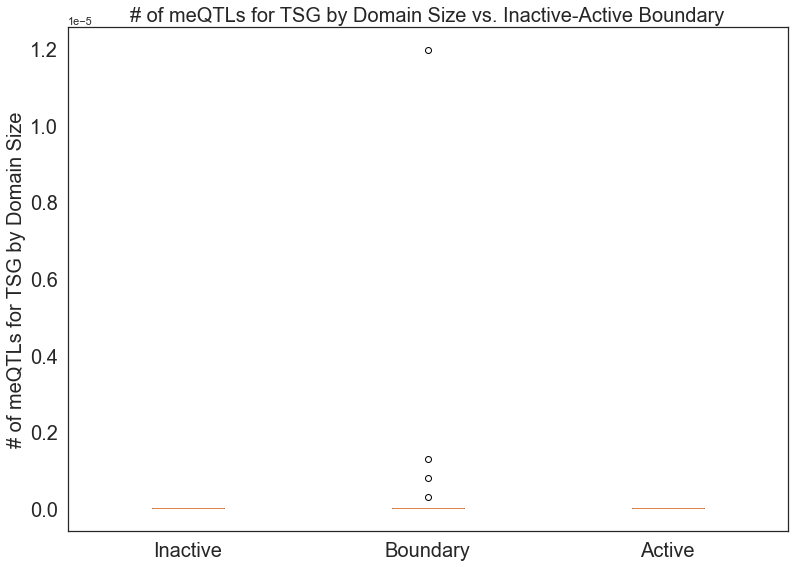

In [56]:
data13 = [inactive_active_tsg[0], inactive_active_boundary_tsg, inactive_active_tsg[1]]
fig13 = plt.figure(figsize =(10, 7))
ax13 = fig13.add_axes([0, 0, 1, 1])
boxplt13 = ax13.boxplot(data13)
plt.ylabel("# of meQTLs for TSG by Domain Size", fontsize=20)
plt.title("# of meQTLs for TSG by Domain Size vs. Inactive-Active Boundary", fontsize=20)
ax13.set_xticklabels(["Inactive", "Boundary", "Active"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

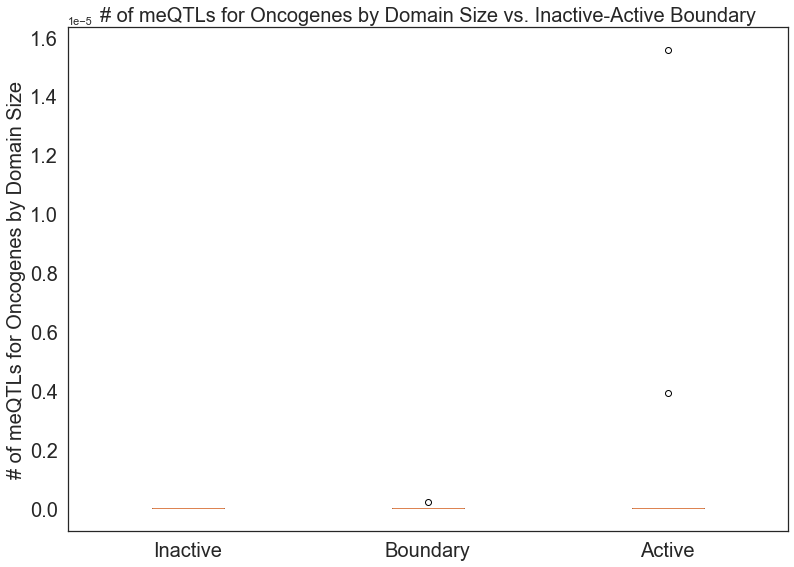

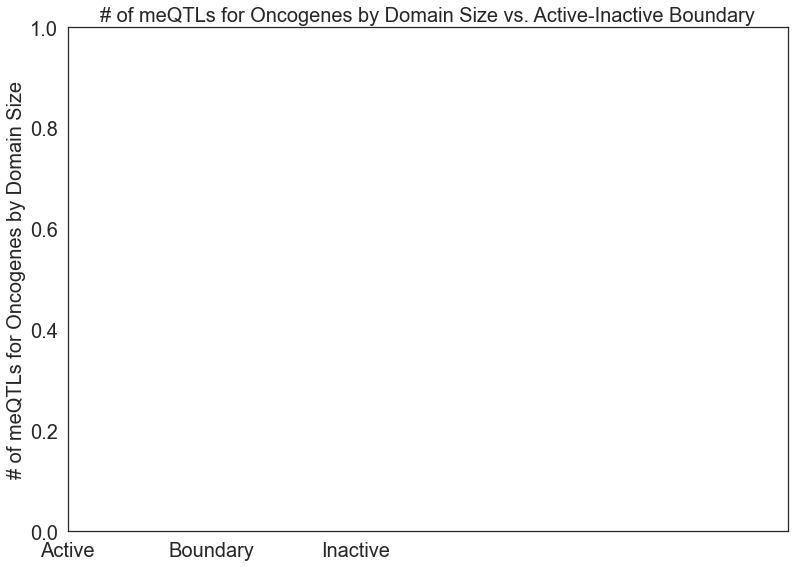

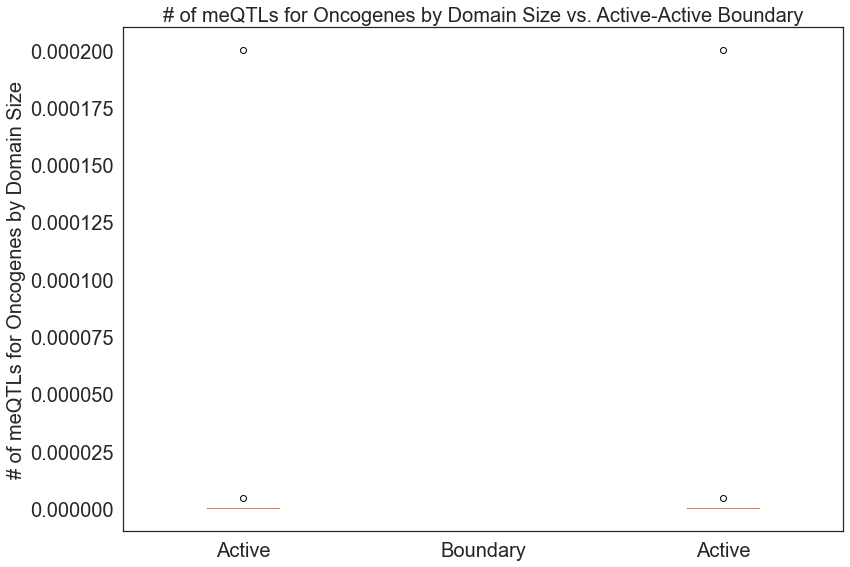

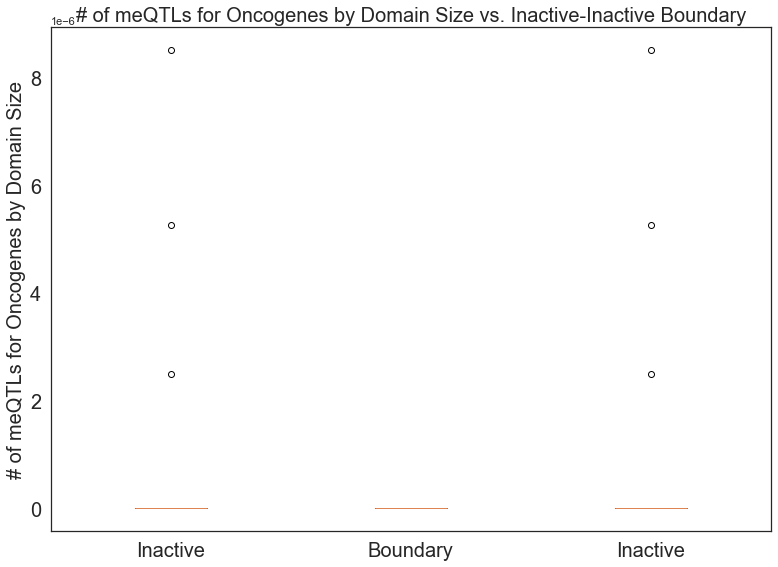

In [43]:
#oncogenes
data10 = [inactive_active_onco[0], inactive_active_boundary_onco, inactive_active_onco[1]]
fig10 = plt.figure(figsize =(10, 7))
ax10 = fig10.add_axes([0, 0, 1, 1])
boxplt10 = ax10.boxplot(data10)
plt.ylabel("# of meQTLs for Oncogenes by Domain Size", fontsize=20)
plt.title("# of meQTLs for Oncogenes by Domain Size vs. Inactive-Active Boundary", fontsize=20)
ax10.set_xticklabels(["Inactive", "Boundary", "Active"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

data11 = [active_inactive_onco[0], active_inactive_boundary_onco, active_inactive_onco[1]]
fig11 = plt.figure(figsize =(10, 7))
ax11 = fig11.add_axes([0, 0, 1, 1])
boxplt2 = ax2.boxplot(data11)
plt.ylabel("# of meQTLs for Oncogenes by Domain Size", fontsize=20)
plt.title("# of meQTLs for Oncogenes by Domain Size vs. Active-Inactive Boundary", fontsize=20)
ax11.set_xticklabels(["Active", "Boundary", "Inactive"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

data12 = [active_active_onco[0], active_active_boundary_onco, active_active_onco[1]]
fig12 = plt.figure(figsize =(10, 7))
ax12 = fig12.add_axes([0, 0, 1, 1])
boxplt12 = ax12.boxplot(data12)
plt.ylabel("# of meQTLs for Oncogenes by Domain Size", fontsize=20)
plt.title("# of meQTLs for Oncogenes by Domain Size vs. Active-Active Boundary", fontsize=20)
ax12.set_xticklabels(["Active", "Boundary", "Active"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()

data13 = [inactive_inactive_onco[0], inactive_inactive_boundary_onco, inactive_inactive_onco[1]]
fig13 = plt.figure(figsize =(10, 7))
ax13 = fig13.add_axes([0, 0, 1, 1])
boxplt13 = ax13.boxplot(data13)
plt.ylabel("# of meQTLs for Oncogenes by Domain Size", fontsize=20)
plt.title("# of meQTLs for Oncogenes by Domain Size vs. Inactive-Inactive Boundary", fontsize=20)
ax13.set_xticklabels(["Inactive", "Boundary", "Inactive"], fontsize=20)
plt.yticks(fontsize=20)
plt.show()